<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://pythonquants.com' target='_blank'>www.pythonquants.com</a>

**Contact us** | <a href='mailto:analytics@pythonquants.com'>analytics@pythonquants.com</a>

# Financial Time Series

In [1]:
import warnings
warnings.simplefilter('ignore')

## pandas Basics

In [2]:
import numpy as np
import pandas as pd

### First Steps with DataFrame Class

In [3]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [4]:
df.index  # the index values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
df.columns  # the column names

Index(['numbers'], dtype='object')

In [6]:
df.ix['c']  # selection via index

numbers    30
Name: c, dtype: int64

In [7]:
df.ix[['a', 'd']]  # selection of multiple indices

,numbers
a,10
d,40


In [8]:
df.ix[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [9]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [10]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [14]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [15]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)
  # temporary object; df not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [16]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [17]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
  # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [18]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [19]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [20]:
df[['numbers', 'squares']].std()
  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

### Second Steps with DataFrame Class

In [21]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[-0.099574,  0.903864, -0.391071,  1.14316 ],
       [-1.18772 , -0.629053, -0.544598, -0.558817],
       [ 0.108964, -0.126847,  0.237983, -1.14902 ],
       [ 0.259599,  0.142262, -1.289404, -0.868582],
       [ 0.595378, -1.300355,  1.968736,  0.858138],
       [-1.271673,  2.291388,  0.46974 , -0.296441],
       [-0.669942, -0.243448,  1.41897 , -0.748853],
       [ 1.003259, -0.312168,  0.488982, -0.870672],
       [-0.620324,  1.354376,  0.550236, -0.181703]])

In [22]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-0.099574,0.903864,-0.391071,1.143160
1,-1.187720,-0.629053,-0.544598,-0.558817
2,0.108964,-0.126847,0.237983,-1.149020
3,0.259599,0.142262,-1.289404,-0.868582
4,0.595378,-1.300355,1.968736,0.858138
5,-1.271673,2.291388,0.469740,-0.296441
6,-0.669942,-0.243448,1.418970,-0.748853
7,1.003259,-0.312168,0.488982,-0.870672
8,-0.620324,1.354376,0.550236,-0.181703


In [23]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,-0.099574,0.903864,-0.391071,1.143160
1,-1.187720,-0.629053,-0.544598,-0.558817
2,0.108964,-0.126847,0.237983,-1.149020
3,0.259599,0.142262,-1.289404,-0.868582
4,0.595378,-1.300355,1.968736,0.858138
5,-1.271673,2.291388,0.469740,-0.296441
6,-0.669942,-0.243448,1.418970,-0.748853
7,1.003259,-0.312168,0.488982,-0.870672
8,-0.620324,1.354376,0.550236,-0.181703


In [24]:
df['No2'][3]  # value in column No2 at index position 3

0.14226187681415922

In [25]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [26]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,-0.099574,0.903864,-0.391071,1.143160
2015-02-28,-1.187720,-0.629053,-0.544598,-0.558817
2015-03-31,0.108964,-0.126847,0.237983,-1.149020
2015-04-30,0.259599,0.142262,-1.289404,-0.868582
2015-05-31,0.595378,-1.300355,1.968736,0.858138
2015-06-30,-1.271673,2.291388,0.469740,-0.296441
2015-07-31,-0.669942,-0.243448,1.418970,-0.748853
2015-08-31,1.003259,-0.312168,0.488982,-0.870672
2015-09-30,-0.620324,1.354376,0.550236,-0.181703


In [27]:
np.array(df).round(6)

array([[-0.099574,  0.903864, -0.391071,  1.14316 ],
       [-1.18772 , -0.629053, -0.544598, -0.558817],
       [ 0.108964, -0.126847,  0.237983, -1.14902 ],
       [ 0.259599,  0.142262, -1.289404, -0.868582],
       [ 0.595378, -1.300355,  1.968736,  0.858138],
       [-1.271673,  2.291388,  0.46974 , -0.296441],
       [-0.669942, -0.243448,  1.41897 , -0.748853],
       [ 1.003259, -0.312168,  0.488982, -0.870672],
       [-0.620324,  1.354376,  0.550236, -0.181703]])

### Basic Analytics

In [28]:
df.sum()

No1   -1.882033
No2    2.080017
No3    2.909572
No4   -2.672790
dtype: float64

In [29]:
df.mean()

No1   -0.209115
No2    0.231113
No3    0.323286
No4   -0.296977
dtype: float64

In [30]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,-0.099574,0.903864,-0.391071,1.143160
2015-02-28,-1.287294,0.274811,-0.935669,0.584343
2015-03-31,-1.178330,0.147963,-0.697687,-0.564677
2015-04-30,-0.918732,0.290225,-1.987091,-1.433259
2015-05-31,-0.323353,-1.010129,-0.018355,-0.575122
2015-06-30,-1.595027,1.281258,0.451385,-0.871562
2015-07-31,-2.264969,1.037810,1.870355,-1.620415
2015-08-31,-1.261709,0.725641,2.359337,-2.491087
2015-09-30,-1.882033,2.080017,2.909572,-2.672790


In [31]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.209115,0.231113,0.323286,-0.296977
std,0.784066,1.101176,0.992473,0.796568
min,-1.271673,-1.300355,-1.289404,-1.149020
25%,-0.669942,-0.312168,-0.391071,-0.868582
50%,-0.099574,-0.126847,0.469740,-0.558817
75%,0.259599,0.903864,0.550236,-0.181703
max,1.003259,2.291388,1.968736,1.143160


In [32]:
np.sqrt(df)

,No1,No2,No3,No4
2015-01-31,NaN,0.950718,NaN,1.069187
2015-02-28,NaN,NaN,NaN,NaN
2015-03-31,0.330096,NaN,0.487835,NaN
2015-04-30,0.509508,0.377176,NaN,NaN
2015-05-31,0.771608,NaN,1.403117,0.926357
2015-06-30,NaN,1.513733,0.685376,NaN
2015-07-31,NaN,NaN,1.191205,NaN
2015-08-31,1.001628,NaN,0.699272,NaN
2015-09-30,NaN,1.163776,0.741779,NaN


In [33]:
np.sqrt(df).sum()

No1    2.612841
No2    4.005403
No3    5.208583
No4    1.995544
dtype: float64

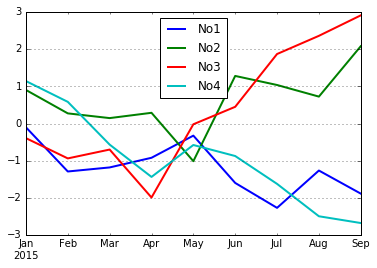

In [34]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)
# tag: dataframe_plot
# title: Line plot of a DataFrame object

### Series Class

In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df['No1']

2015-01-31   -0.099574
2015-02-28   -1.187720
2015-03-31    0.108964
2015-04-30    0.259599
2015-05-31    0.595378
2015-06-30   -1.271673
2015-07-31   -0.669942
2015-08-31    1.003259
2015-09-30   -0.620324
Freq: M, Name: No1, dtype: float64

In [37]:
type(df['No1'])

pandas.core.series.Series

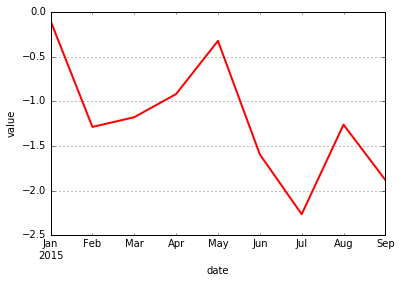

In [38]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')
# tag: time_series
# title: Line plot of a Series object

### GroupBy Operations

In [39]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-0.099574,0.903864,-0.391071,1.143160,Q1
2015-02-28,-1.187720,-0.629053,-0.544598,-0.558817,Q1
2015-03-31,0.108964,-0.126847,0.237983,-1.149020,Q1
2015-04-30,0.259599,0.142262,-1.289404,-0.868582,Q2
2015-05-31,0.595378,-1.300355,1.968736,0.858138,Q2
2015-06-30,-1.271673,2.291388,0.469740,-0.296441,Q2
2015-07-31,-0.669942,-0.243448,1.418970,-0.748853,Q3
2015-08-31,1.003259,-0.312168,0.488982,-0.870672,Q3
2015-09-30,-0.620324,1.354376,0.550236,-0.181703,Q3


In [40]:
groups = df.groupby('Quarter')

In [41]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.392777,0.049321,-0.232562,-0.188226
Q2,-0.138899,0.377765,0.383024,-0.102295
Q3,-0.095669,0.266253,0.819396,-0.600409


In [42]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.108964,0.903864,0.237983,1.143160
Q2,0.595378,2.291388,1.968736,0.858138
Q3,1.003259,1.354376,1.418970,-0.181703


In [43]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [44]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [45]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [46]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [47]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -1.187720 -0.629053 -0.544598 -0.558817
        Odd       0.004695  0.388508 -0.076544 -0.002930
Q2      Even     -0.506037  1.216825 -0.409832 -0.582512
        Odd       0.595378 -1.300355  1.968736  0.858138
Q3      Even      1.003259 -0.312168  0.488982 -0.870672
        Odd      -0.645133  0.555464  0.984603 -0.465278

## Financial Data

In [48]:
import pandas.io.data as web

In [49]:
DAX = web.DataReader(name='^GDAXI', data_source='yahoo',
                     start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4213 entries, 2000-01-03 to 2016-07-15
Data columns (total 6 columns):
Open         4213 non-null float64
High         4213 non-null float64
Low          4213 non-null float64
Close        4213 non-null float64
Volume       4213 non-null int64
Adj Close    4213 non-null float64
dtypes: float64(5), int64(1)
memory usage: 230.4 KB


In [50]:
DAX.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-11,9744.799805,9841.860352,9690.179688,9833.410156,78371600,9833.410156
2016-07-12,9850.400391,10013.490234,9841.110352,9964.070312,98609200,9964.070312
2016-07-13,9941.990234,10001.870117,9919.410156,9930.709961,93416800,9930.709961
2016-07-14,10058.490234,10109.860352,9984.549805,10068.299805,97397700,10068.299805
2016-07-15,10031.179688,10098.750000,9987.049805,10066.900391,87292700,10066.900391


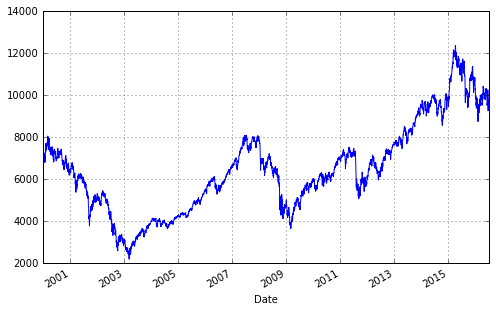

In [51]:
DAX['Close'].plot(figsize=(8, 5), grid=True)
# tag: dax
# title: Historical DAX index levels

In [52]:
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

CPU times: user 28.6 ms, sys: 485 µs, total: 29.1 ms
Wall time: 28.8 ms


In [53]:
DAX[['Close', 'Return', 'Return']].tail()

,Close,Return,Return
Date,,,
2016-07-11,9833.410156,0.020938,0.020938
2016-07-12,9964.070312,0.013200,0.013200
2016-07-13,9930.709961,-0.003354,-0.003354
2016-07-14,10068.299805,0.013760,0.013760
2016-07-15,10066.900391,-0.000139,-0.000139


array([<matplotlib.axes._subplots.AxesSubplot object at 0x117d1ec18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a8b2710>], dtype=object)

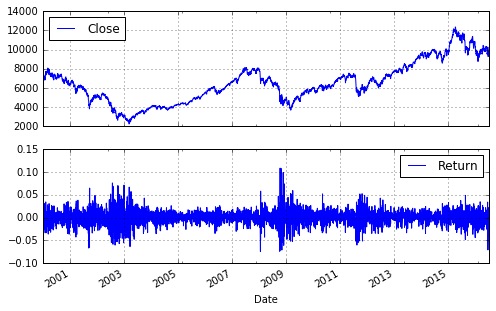

In [54]:
DAX[['Close', 'Return']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True)
# tag: dax_returns
# title: The DAX index and daily log returns

In [55]:
DAX['42d'] = pd.rolling_mean(DAX['Close'], window=42)
DAX['252d'] = pd.rolling_mean(DAX['Close'], window=252)

In [56]:
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2016-07-11,9833.410156,9876.055990,10188.383301
2016-07-12,9964.070312,9878.483375,10182.130960
2016-07-13,9930.709961,9877.955032,10175.043461
2016-07-14,10068.299805,9882.195731,10168.673937
2016-07-15,10066.900391,9885.140253,10162.051638


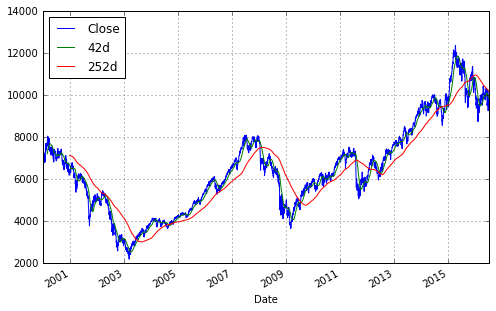

In [57]:
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)
# tag: dax_trends
# title: The DAX index and moving averages

In [58]:
import math
DAX['Mov_Vol'] = pd.rolling_std(DAX['Return'],
                                window=252) * math.sqrt(252)
  # moving annual volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a9017b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11ad54be0>], dtype=object)

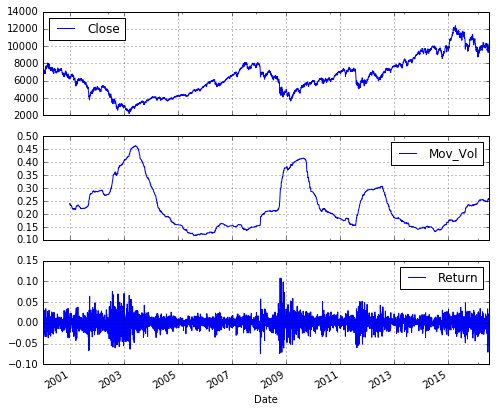

In [59]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True)
# tag: dax_mov_std
# title: The DAX index and moving, annualized volatility

## Regression Analysis

In [63]:
import pandas as pd
from urllib.request import urlretrieve

In [64]:
es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')
!ls -o ./data/*.txt
# Windows: use dir

-rw-r--r--  1 aborodya  678399 Jul 17 12:08 ./data/es.txt
-rw-r--r--  1 aborodya  363485 Jul 17 12:08 ./data/vs.txt


In [65]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [66]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [67]:
for line in lines[3883:3890]:
    print line[41:],

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-67-503d2be26c1d>, line 2)

In [68]:
new_file = open('./data/es50.txt', 'w')
    # opens a new file
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
    # writes the corrected third line of the orginal file
    # as first line of new file
new_file.writelines(lines[4:])
    # writes the remaining lines of the orginial file
new_file.close()

In [69]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [70]:
es = pd.read_csv('./data/es50.txt', index_col=0,
                 parse_dates=True, sep=';', dayfirst=True)

In [71]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-04-26,2923.0,3121.0,347.0,330.0,412.0,354.0,9395.0,588.0,NaN
2016-04-27,2927.0,3130.0,348.0,332.0,413.0,354.0,9424.0,589.0,NaN
2016-04-28,2932.0,3125.0,349.0,332.0,414.0,355.0,9459.0,592.0,NaN
2016-04-29,2856.0,3028.0,341.0,324.0,405.0,349.0,9278.0,582.0,NaN
2016-05-02,2852.0,3033.0,341.0,324.0,405.0,348.0,9238.0,579.0,NaN


In [72]:
del es['DEL'] 
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7562 entries, 1986-12-31 to 2016-05-02
Data columns (total 8 columns):
SX5P    7562 non-null float64
SX5E    7562 non-null float64
SXXP    7562 non-null float64
SXXE    7562 non-null float64
SXXF    7562 non-null float64
SXXA    7562 non-null float64
DK5F    7562 non-null float64
DKXF    7562 non-null float64
dtypes: float64(8)
memory usage: 531.7 KB


In [73]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [74]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-04-26,2922.57,3121.29,347.31,330.30,411.75,353.79,9395.03,587.73
2016-04-27,2927.31,3130.43,348.32,331.69,413.25,354.41,9424.15,589.23
2016-04-28,2932.00,3125.43,348.90,331.76,413.78,355.47,9459.04,591.95
2016-04-29,2856.28,3028.21,341.48,323.70,404.71,348.87,9278.19,581.67
2016-05-02,2852.10,3032.60,341.24,324.22,404.91,347.90,9238.16,578.79


In [75]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,
                 parse_dates=True, dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [76]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [77]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4443 entries, 1999-01-04 to 2016-05-02
Data columns (total 2 columns):
EUROSTOXX    4443 non-null float64
VSTOXX       4443 non-null float64
dtypes: float64(2)
memory usage: 104.1 KB


In [78]:
data.tail()

,EUROSTOXX,VSTOXX
2016-04-26,3121.29,35.6846
2016-04-27,3130.43,35.6846
2016-04-28,3125.43,35.6846
2016-04-29,3028.21,35.6846
2016-05-02,3032.60,35.6846


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b37b4e0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11bac9128>], dtype=object)

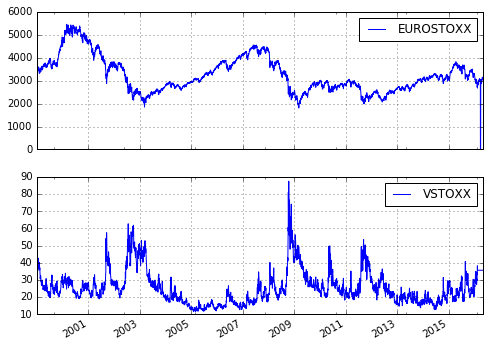

In [79]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs
# title: The EURO STOXX 50 Index and the VSTOXX volatility index

In [80]:
rets = np.log(data / data.shift(1)) 
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ae4be10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11aefcda0>], dtype=object)

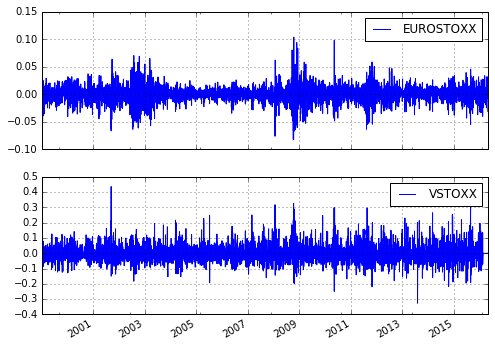

In [81]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs_rets
# title: Log returns of EURO STOXX 50 and VSTOXX

In [82]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
model = pd.ols(y=ydat, x=xdat)
model

ValueError: array must not contain infs or NaNs

In [83]:
model.beta

x           NaN
intercept   NaN
dtype: float64

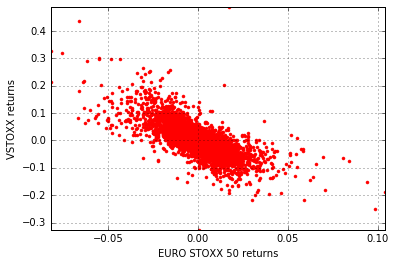

In [84]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')
# tag: scatter_rets
# title: Scatter plot of log returns and regression line

In [85]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.733192
VSTOXX,-0.733192,1.000000


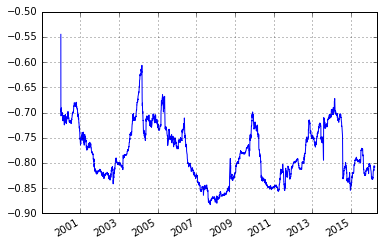

In [86]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'],
                window=252).plot(grid=True, style='b')
# tag: roll_corr
# title: Rolling correlation between EURO STOXX 50 and VSTOXX

## High Frequency Data

In [88]:
import numpy as np
import pandas as pd
import datetime as dt
from urllib.request import urlretrieve
%matplotlib inline

In [101]:
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NEXT&csv_format=csv'
url = url1 + url2

In [106]:
year = '2016'
month = '07'
days = ['13', '14', '15', '16', '17']
  # dates might need to be updated

In [107]:
url % (year, month, day)

'http://www.netfonds.no/quotes/posdump.php?date=20160707&paper=NEXT&csv_format=csv'

In [108]:
NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day),
                       index_col=0, header=0, parse_dates=True))
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']
  # shorter colummn names

In [109]:
NKE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3117 entries, 2016-07-13 05:10:46 to 2016-07-15 16:25:16
Data columns (total 6 columns):
bid        3117 non-null float64
bdepth     3117 non-null float64
bdeptht    3117 non-null float64
offer      3117 non-null float64
odepth     3117 non-null float64
odeptht    3117 non-null float64
dtypes: float64(6)
memory usage: 170.5 KB


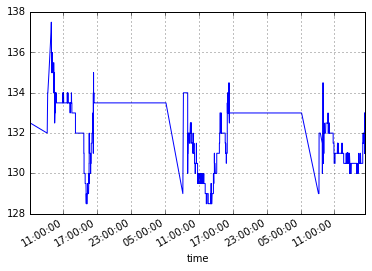

In [110]:
NKE['bid'].plot(grid=True)
# tag: aapl
# title: Nike stock tick data for a week

In [111]:
to_plot = NKE[['bid', 'bdeptht']][
    (NKE.index > dt.datetime(2015, 8, 4, 0, 0))
 &  (NKE.index < dt.datetime(2015, 8, 5, 2, 59))]
  # adjust dates to given data set
to_plot.plot(subplots=True, style='b', figsize=(8, 5), grid=True)
# tag: aapl_day
# title: Apple stock tick data and volume for a trading day

TypeError: Empty 'DataFrame': no numeric data to plot

In [112]:
NKE_resam = NKE.resample(rule='5min', how='mean')
np.round(NKE_resam.head(), 2)

,bid,bdepth,bdeptht,offer,odepth,odeptht
time,,,,,,
2016-07-13 05:10:00,132.5,432.0,25461.0,135.0,25688.0,36277.0
2016-07-13 05:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-13 05:20:00,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-13 05:25:00,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-13 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN


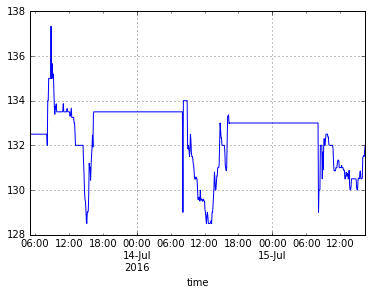

In [113]:
NKE_resam['bid'].fillna(method='ffill').plot(grid=True)
# tag: aapl_resam
# title: Resampled Apple stock tick data

In [114]:
def reversal(x):
    return 2 * 95 - x

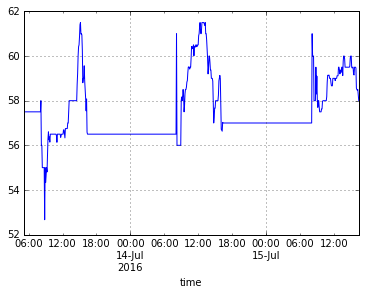

In [115]:
NKE_resam['bid'].fillna(method='ffill').apply(reversal).plot(grid=True)
# tag: aapl_resam_apply
# title: Resampled Apple stock tick data with function applied to it

In [116]:
!rm ./data/*
  # Windows: del /data/*

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://www.pythonquants.com" target="_blank">www.pythonquants.com</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a>

<a href="mailto:analytics@pythonquants.com">analytics@pythonquants.com</a>

**Python Quant Platform** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**Derivatives Analytics with Python** |
<a href="http://www.derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Python for Finance** |
<a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">Python for Finance @ O'Reilly</a>